In [2]:
# Nicholas M. Staich

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2) Brief description of data

Spending by federal agency by statre and office.

3) What is the target?

Send by org

4) Is this a classification or regression problem?

* Classification


5) How many features?

* 5

6) How many rows of data.

* 6,557

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

* Properly structuring the data on this one is my major concern.  I am interested to see what I can do with this data.

#Project 2 - Part 2 (Core)

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

-clearly commented all of your cleaning steps and described any decisions you made  (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. The more notes you take now, the easier that presentation will be. To clarify, that presentation is NOT due now.)

Note that you should start working on your in depth EDA and making multivariate visuals for the upcoming part 3 of this assignment once you have submitted all tasks and your belt exam for this stack.

Commit your file to your Github repository and submit the link below.


In [128]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping


## Federal Spending Data Set



In [51]:
#Grab the data
data_source_2 = ('/content/drive/MyDrive/Coding Dojo/Data USA Cart.csv')

df = pd.read_csv(data_source_2)
df.head()

,ID Geography,Geography,ID Agency,Agency,Obligation Amount (2017)
0,04000US11,District of Columbia,1100,Executive Office of the President,63125124.30
1,04000US17,Illinois,1100,Executive Office of the President,436400.70
2,04000US36,New York,1100,Executive Office of the President,-25400.44
3,04000US51,Virginia,1100,Executive Office of the President,114026.54
4,04000US04,Arizona,1127,Office of the National Drug Control Policy,9700578.94


In [52]:
df.shape

(6557, 5)

In [53]:
df.dtypes

ID Geography                 object
Geography                    object
ID Agency                    object
Agency                       object
Obligation Amount (2017)    float64
dtype: object

In [54]:
# Replace the US letters in the 
#df = df[~df['ID Agency'].str.contains("[a-zA-Z]").fillna(False)]


In [55]:
df['ID Agency'].value_counts()

4732    52
1448    52
7529    52
7526    52
7524    52
        ..
9504     1
9511     1
2004     1
9502     1
4700     1
Name: ID Agency, Length: 209, dtype: int64

In [56]:
df.shape

(6557, 5)

In [57]:
#Replace the letters in the Agency IDs with numbers.  Only 2 values lost. Able to save 
def str_to_int_map(string, mapping):

   return int(''.join([str(mapping.get(x, x)) for x in string]))
mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q":17,"R":18, "S": 19, "T": 20,"U": 21, "V": 22, "W": 23, "X": 24, "Y": 25, "Z":26}
df['ID Agency'] = df['ID Agency'].apply(lambda x: str_to_int_map(x, mapping))

In [58]:
df['ID Agency'].value_counts()

9761    66
9748    52
9100    52
5920    52
2100    52
        ..
9515     1
8944     1
4775     1
9502     1
9504     1
Name: ID Agency, Length: 207, dtype: int64

In [59]:
#Check for missing values 
df.value_counts().isna()

ID Geography  Geography       ID Agency  Agency                                                      Obligation Amount (2017)
04000US01     Alabama         1145       Peace Corps                                                 3.819297e+04                False
04000US37     North Carolina  7570       Office of the Assistant Secretary for Administration (ASA)  2.747554e+07                False
                              8800       National Archives and Records Administration                1.257185e+04                False
                              8653       Office of Lead Hazard Control and Healthy Homes             2.835379e+06                False
                              8635       Assistant Secretary for Public and Indian Housing           3.616013e+08                False
                                                                                                                                 ...  
04000US20     Kansas          6000       Railroad Retirement Boa

In [60]:
def str_to_int_map(string, mapping):

   return int(''.join([str(mapping.get(x, x)) for x in string]))
mapping = {"U": 1, "S": 2}
df['ID Geography'] = df['ID Geography'].apply(lambda x: str_to_int_map(x, mapping))

In [61]:
df.rename({'Obligation Amount (2017)':'Obligation'}, axis='columns', inplace=True)
df.head()

,ID Geography,Geography,ID Agency,Agency,Obligation
0,40001211,District of Columbia,1100,Executive Office of the President,63125124.30
1,40001217,Illinois,1100,Executive Office of the President,436400.70
2,40001236,New York,1100,Executive Office of the President,-25400.44
3,40001251,Virginia,1100,Executive Office of the President,114026.54
4,40001204,Arizona,1127,Office of the National Drug Control Policy,9700578.94



Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.  

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

-clearly commented all of your cleaning steps and described any decisions you made  (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. The more notes you take now, the easier that presentation will be. To clarify, that presentation is NOT due now.)

Note that you should start working on your in depth EDA and making multivariate visuals for the upcoming part 3 of this assignment once you have submitted all tasks and your belt exam for this stack.

Commit your file to your Github repository and submit the link below.

In [62]:
df.columns

Index(['ID Geography', 'Geography', 'ID Agency', 'Agency', 'Obligation'], dtype='object')

In [63]:
df.shape

(6557, 5)

In [64]:
df_obj = df.select_dtypes(include = 'object')
#df_obj.drop(columns = ['ID Geography', 'ID Agency'], inplace=True)
df_obj_cols = list(df_obj)
for col in df_obj_cols:
  print(f"col: {df_obj[col].unique()}\n")


col: ['District of Columbia' 'Illinois' 'New York' 'Virginia' 'Arizona'
 'California' 'Colorado' 'Delaware' 'Florida' 'Hawaii' 'Indiana'
 'Maryland' 'Minnesota' 'Missouri' 'Montana' 'Nebraska' 'New Jersey'
 'New Mexico' 'Ohio' 'Pennsylvania' 'Tennessee' 'Texas' 'Utah'
 'Washington' 'Wisconsin' 'Alabama' 'Georgia' 'Iowa' 'Kansas' 'Louisiana'
 'Michigan' 'North Carolina' 'Oregon' 'Vermont' 'Connecticut' 'Idaho'
 'Maine' 'Massachusetts' 'South Carolina' 'Alaska' 'Arkansas' 'Kentucky'
 'Nevada' 'New Hampshire' 'Oklahoma' 'West Virginia' 'Wyoming'
 'Mississippi' 'North Dakota' 'Rhode Island' 'South Dakota' 'Puerto Rico']

col: ['Executive Office of the President'
 'Office of the National Drug Control Policy' 'Peace Corps'
 'United States Trade and Development Agency'
 'Office of Inspector General' 'Office of the Chief Financial Officer'
 'Forest Service' 'Natural Resources Conservation Service'
 'Farm Service Agency' 'Foreign Agricultural Service'
 'Risk Management Agency' 'Rural Utilities 

In [65]:
df.drop(columns = ['Geography', 'Agency'], inplace=True)

In [66]:
#Check for missing data...it's never easy.
print('Missing data:\n', df.isna().sum())
print('\n')


Missing data:
 ID Geography    0
ID Agency       0
Obligation      0
dtype: int64




In [67]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [68]:
df['Obligation'].value_counts()

0.000000e+00    117
2.500000e+05     14
6.000000e+03      9
1.500000e+04      8
1.000000e+04      8
               ... 
2.243315e+06      1
1.048246e+08      1
2.774887e+04      1
8.454839e+05      1
2.071022e+05      1
Name: Obligation, Length: 6321, dtype: int64

In [69]:
df.shape

(6557, 3)

In [70]:
df.dtypes

ID Geography      int64
ID Agency         int64
Obligation      float64
dtype: object

In [71]:
df['ID Agency'] = pd.to_numeric(df['ID Agency'])

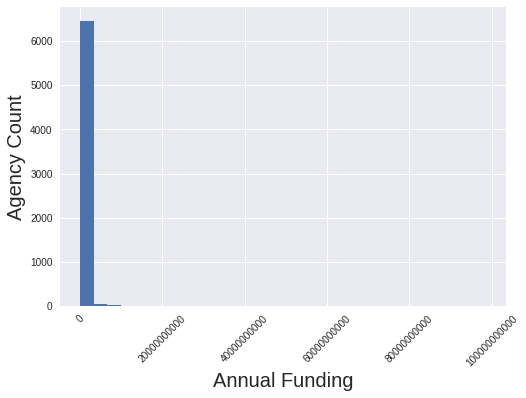

In [72]:
# Change number of bins
df['Obligation'].hist(bins = 30)
plt.xlabel('Annual Funding', fontsize = 20);
plt.xticks(rotation = 45)
plt.ylabel('Agency Count', fontsize = 20);
plt.ticklabel_format(useOffset=False, style='plain')

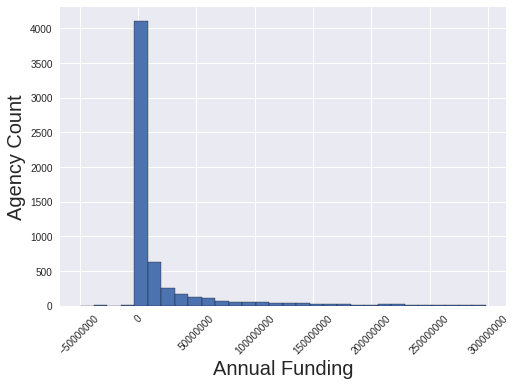

In [73]:
# Adding seaborn style 
plt.style.use('seaborn')
fund_filter = df.loc[:, 'Obligation'] <= 300000000
df.loc[fund_filter, 'Obligation'].hist(bins = 30,
                                   edgecolor='black')
plt.xlabel('Annual Funding', fontsize = 20);
plt.xticks(rotation = 45)
plt.ylabel('Agency Count', fontsize = 20);
plt.ticklabel_format(useOffset=False, style='plain')

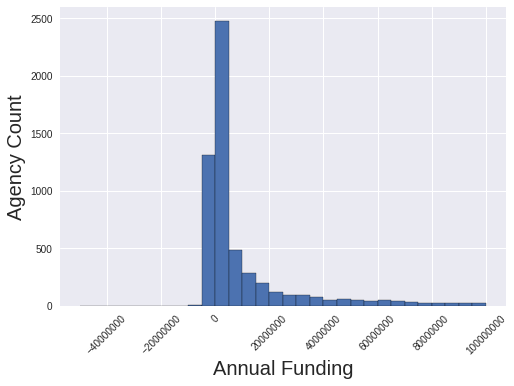

In [74]:
# Adding seaborn style 
plt.style.use('seaborn')
fund_filter = df.loc[:, 'Obligation'] <= 100000000
df.loc[fund_filter, 'Obligation'].hist(bins = 30,
                                   edgecolor='black')
plt.xlabel('Annual Funding', fontsize = 20);
plt.xticks(rotation = 45)
plt.ylabel('Agency Count', fontsize = 20);
plt.ticklabel_format(useOffset=False, style='plain')

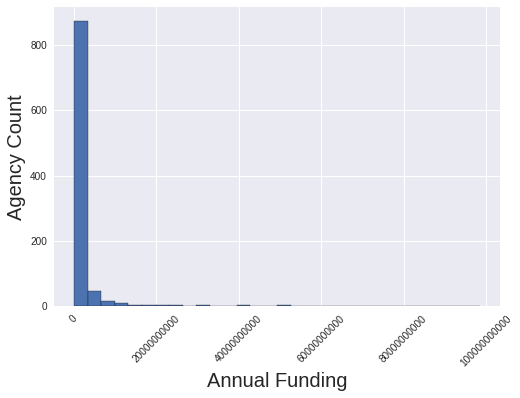

In [75]:
# Adding seaborn style 
plt.style.use('seaborn')
fund_filter = df.loc[:, 'Obligation'] >= 100000000
df.loc[fund_filter, 'Obligation'].hist(bins = 30,
                                   edgecolor='black')
plt.xlabel('Annual Funding', fontsize = 20);
plt.xticks(rotation = 45)
plt.ylabel('Agency Count', fontsize = 20);
plt.ticklabel_format(useOffset=False, style='plain')

In [76]:
fundFilter = df['Obligation'] >= 0
#numpy set_printoptions(suppress=True)
top20Agency = df.loc[fundFilter, :].groupby(['ID Agency'])['Obligation'].mean().sort_values(ascending = False).head(20)

print(top20Agency)

ID Agency
7530     1.432637e+10
2800     1.166063e+10
1700     1.812652e+09
3640     1.488336e+09
2100     1.205472e+09
5700     1.014656e+09
3620     9.708373e+08
9100     7.603765e+08
6925     7.150690e+08
8900     5.502641e+08
97119    5.240991e+08
7529     5.114165e+08
3600     4.762940e+08
8635     4.167235e+08
7022     2.615122e+08
9748     2.386079e+08
8620     2.377802e+08
8000     2.305963e+08
8630     1.821354e+08
6000     1.798832e+08
Name: Obligation, dtype: float64


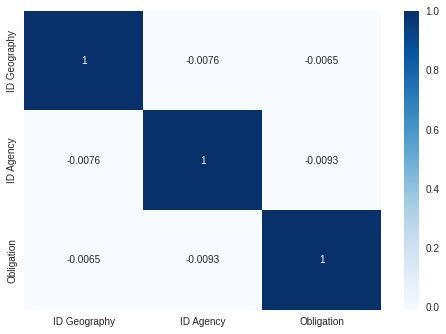

In [77]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

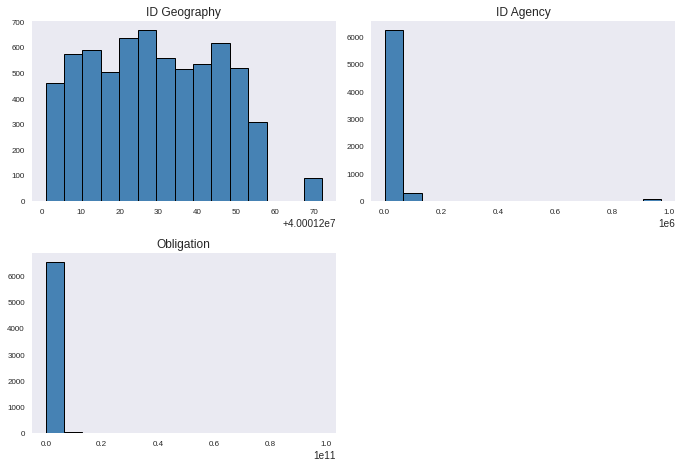

In [78]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


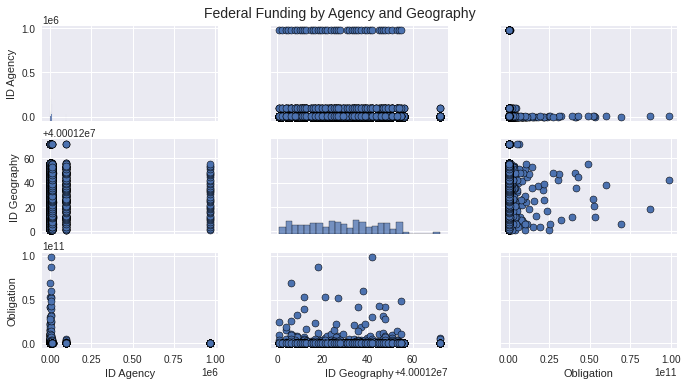

In [79]:

# Scatter Plot with Hue for visualizing data in 3-D
cols = ['ID Agency', 'ID Geography', 'Obligation']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Federal Funding by Agency and Geography', fontsize=14)

#Project 2 - Part 3 (Core)

Link to Video

Project 2 - Part 3 (Core)


For this part of the project, create a 5-10  min video presentation with slide show that is designed for a TECHNICAL audience that addresses your data preparation and exploratory analysis for your selected data set. 

This is a chance for you to articulate what you have been working on, the decisions you have made, and the challenges you may have encountered.

Keep in mind that the information you share with a technical audience or a non-technical audience will be quite different, so it is important to differentiate between the two.  

Since this is a TECHNICAL audience, you may share code snippets and discuss the cleaning steps. For your final presentation, however, your audience will be non-technical and you will not include this type of information.  

To include in your presentation:

* Intro and background about your data set
* Explanation of the cleaning steps required and a brief explanation of how you addressed them in your data set.
* If there were null values, explain how you addressed them.
At least two exploratory visuals you used to understand your data set and what you learned from each.
* If relevant, any unique challenges you encountered while working with this data set and how you handled them.  

Commit your slide deck and video to your GitHub repository. 
Update your readme with a paragraph describing your data, data source, and any important or creative steps you took to prepare it for modeling.

Large files can be saved on Google Drive and the link can be added to GitHub. Ensure that the share settings allow anyone with the link to view the file.

Please submit the link to your GitHub Repository.

#Project 2- Part 4 (Core)


You are now entering into the model development phase of the project!

* Ensure that you complete the appropriate pre-processing steps
* Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model)
* Evaluate model performance with appropriate metrics for the model
* Choose your "production" model and justify this decision
* Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!)
* Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.

Commit your code to GitHub

Submit the link to your GitHub repository.

In [40]:
pd.set_option('display.max_columns', None)
df.head()

,ID Geography,ID Agency,Obligation
0,40001211,1100,63125124.30
1,40001217,1100,436400.70
2,40001236,1100,-25400.44
3,40001251,1100,114026.54
4,40001204,1127,9700578.94


In [41]:
#Check for Duplicates
df.duplicated().sum()

0

In [42]:
#Check for missing values
df.isna().sum()

ID Geography    0
ID Agency       0
Obligation      0
dtype: int64

In [43]:
#Ensure all feature values are equal
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6557 entries, 0 to 6556
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Geography  6557 non-null   int64  
 1   ID Agency     6557 non-null   int64  
 2   Obligation    6557 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 462.9 KB


In [44]:
df.describe()

,ID Geography,ID Agency,Obligation
count,6.557000e+03,6557.000000,6.557000e+03
mean,4.000123e+07,15389.394235,3.111910e+08
std,1.630089e+01,80891.875859,2.890525e+09
min,4.000120e+07,1100.000000,-4.986557e+07
25%,4.000122e+07,1550.000000,1.676523e+05
50%,4.000123e+07,5950.000000,2.490202e+06
75%,4.000124e+07,7545.000000,2.676413e+07
max,4.000127e+07,972619.000000,9.858464e+10


In [39]:
#Scale the datasett in preparation for modeling
df_scaled = StandardScaler().fit_transform(df)

In [48]:
# Check that data set scaled
df_scaled

array([[-1.10510465, -0.17666155, -0.08582689],
       [-0.73699842, -0.17666155, -0.1075162 ],
       [ 0.42867132, -0.17666155, -0.10767598],
       ...,
       [ 1.47163898, 11.83434797, -0.10725314],
       [ 1.53299001, 11.83434797, -0.10763771],
       [ 1.59434105, 11.83434797, -0.10759554]])

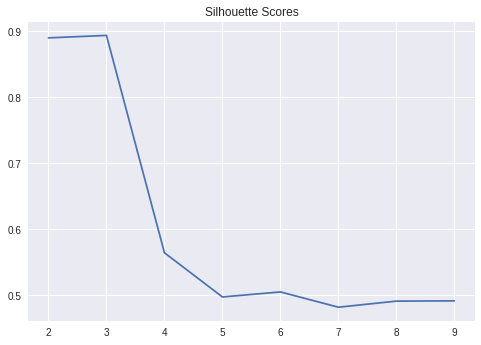

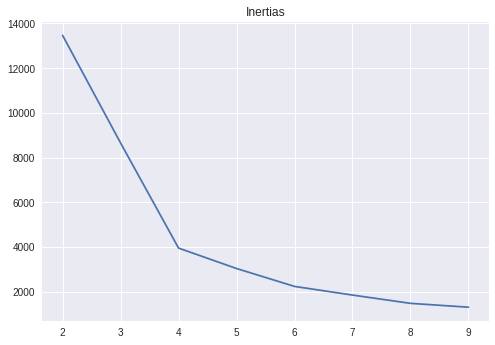

In [82]:
#Start with Kmeans to determine optimal clustering patterns
k_range = range(2, 10)
sil_scores = []
inertias = []

for k in k_range:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df_scaled)

  sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)

plt.plot(k_range, sil_scores)
plt.title('Silhouette Scores')
plt.show()

plt.plot(k_range, inertias)
plt.title('Inertias')
plt.show();

In [83]:
kmeans_final = KMeans(n_clusters = 4)
kmeans_final.fit(df_scaled)

df['cluster'] = kmeans_final.labels_

In [84]:
clusters_grouped = df.groupby('cluster').mean()
clusters_grouped

,ID Geography,ID Agency,Obligation
cluster,,,
0,4.000122e+07,8940.123748,1.876579e+08
1,4.000124e+07,8923.026452,1.680181e+08
2,4.000123e+07,5729.473684,4.630222e+10
3,4.000123e+07,972619.000000,6.749714e+07


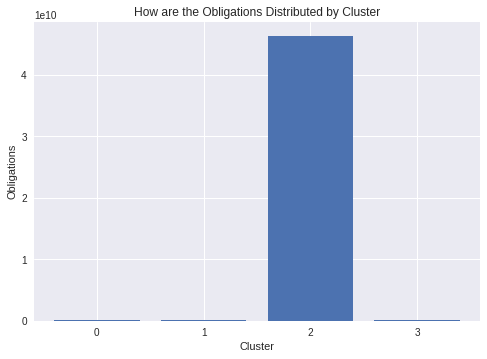

In [90]:
plt.bar(clusters_grouped.index, clusters_grouped['Obligation'])
plt.title('How are the Obligations Distributed by Cluster')
plt.ylabel('Obligations')
plt.xlabel('Cluster')
plt.xticks(clusters_grouped.index);

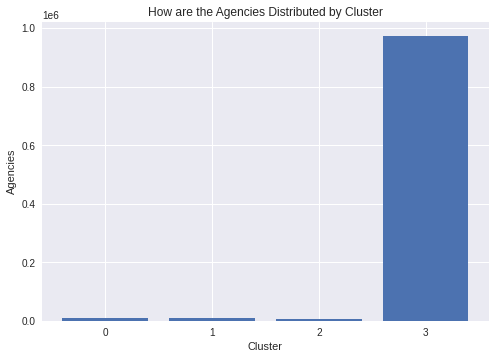

In [92]:
plt.bar(clusters_grouped.index, clusters_grouped['ID Agency'])
plt.title('How are the Agencies Distributed by Cluster')
plt.ylabel('Agencies')
plt.xlabel('Cluster')
plt.xticks(clusters_grouped.index);

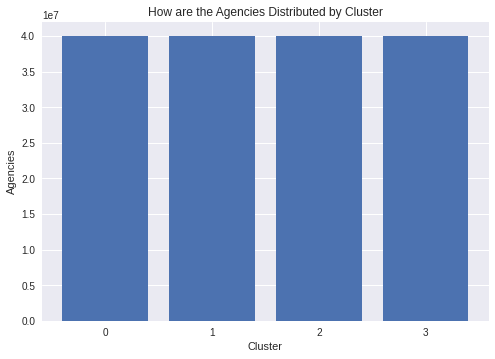

In [93]:
plt.bar(clusters_grouped.index, clusters_grouped['ID Geography'])
plt.title('How are the Agencies Distributed by Cluster')
plt.ylabel('Agencies')
plt.xlabel('Cluster')
plt.xticks(clusters_grouped.index);

In [94]:
#Start your model

X = df.drop(columns=['Obligation', 'cluster'])
y = df['Obligation']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Text(0, 0.5, 'Proportion of Explained Variance')

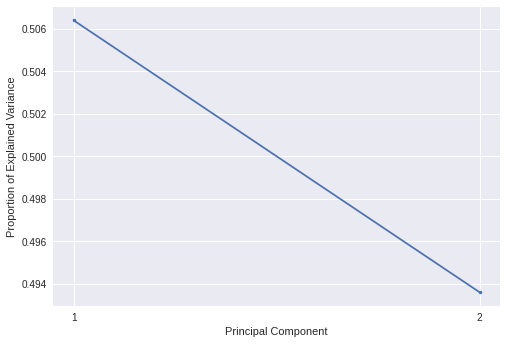

In [98]:
#Run PCA for reducing features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train_scaled)

plt.plot(range(1, 3), pca.explained_variance_ratio_[:3], marker = '.')
plt.xticks(ticks = range(1, 3))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [99]:
exp_var_pca = pca.explained_variance_ratio_ 

In [100]:
exp_var_pca

array([0.50640675, 0.49359325])

In [101]:
pca2 = PCA(n_components=2)
X_train_pca = pca2.fit_transform(X_train_scaled)
X_test_pca = pca2.transform(X_test_scaled)


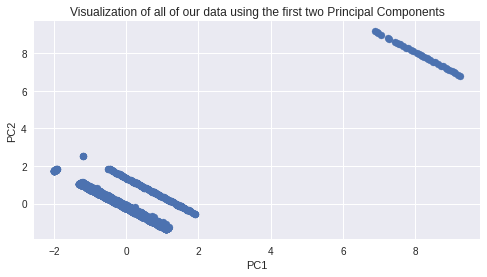

In [113]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [114]:
difference = X_train.shape[1] - X_train_pca.shape[1]

print(f'There are {difference} fewer columns after applying PCA')

There are 0 fewer columns after applying PCA


In [104]:
variance = pca2.explained_variance_ratio_.sum()
print(f'The pca explains {variance:.2f} percent of the variance of the original data')

The pca explains 1.00 percent of the variance of the original data


In [105]:
# def plot_history(history, metrics=None):
#   plt.plot(history.history['loss'], label='training')
#   plt.plot(history.history['val_loss'], label='testing')
#   plt.title('Loss')
#   plt.legend()
#   plt.show()
#   if metrics:
#     for metric in metrics:
#       plt.plot(history.history[metric], label=f'training {metric}')
#       plt.plot(history.history[f'val_{metric}'], label=f'testing {metric}')
#       plt.legend()
#       plt.title(metric)
#       plt.show()


# You can use this function to see how your model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

## Model 1

In [136]:
model1 = Sequential()

model1.add(Dense(2, input_dim = X_train_pca.shape[1],
                activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.compile(loss='mse', optimizer='adam', metrics=['acc', 'mse'])

In [137]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [138]:
history = model1.fit(X_train_pca, y_train,
                    validation_data=(X_test_pca, y_test),
                    epochs=30)

Epoch 1/30
154/154 [==============================] - 1s 3ms/step - loss: 8341591748924932096.0000 - acc: 0.0173 - mse: 8341591748924932096.0000 - val_loss: 8777832333093896192.0000 - val_acc: 0.0195 - val_mse: 8777832333093896192.0000
Epoch 2/30
154/154 [==============================] - 0s 3ms/step - loss: 8341592298680745984.0000 - acc: 0.0089 - mse: 8341592298680745984.0000 - val_loss: 8777832333093896192.0000 - val_acc: 0.0012 - val_mse: 8777832333093896192.0000
Epoch 3/30
154/154 [==============================] - 0s 2ms/step - loss: 8341594497704001536.0000 - acc: 8.1350e-04 - mse: 8341594497704001536.0000 - val_loss: 8777832333093896192.0000 - val_acc: 0.0012 - val_mse: 8777832333093896192.0000
Epoch 4/30
154/154 [==============================] - 0s 2ms/step - loss: 8341591748924932096.0000 - acc: 8.1350e-04 - mse: 8341591748924932096.0000 - val_loss: 8777832333093896192.0000 - val_acc: 0.0012 - val_mse: 8777832333093896192.0000
Epoch 5/30
154/154 [============================

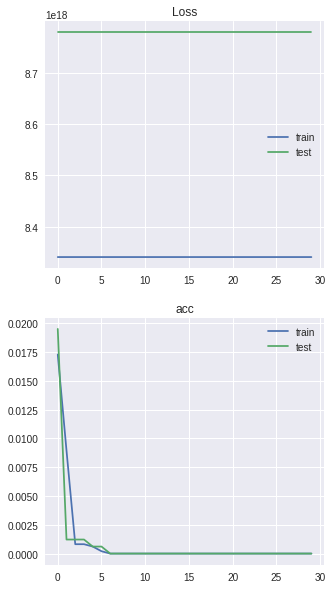

In [139]:
plot_history(history, metric='acc')

## Model 2

In [141]:
model2 = Sequential()

model2.add(Dense(2, input_dim = X_train_pca.shape[1],
                activation = 'relu'))

model2.add(Dense(10, input_dim = X_train_pca.shape[1],
                activation = 'relu'))

model2.add(Dense(1, activation = 'linear'))

model2.compile(loss='mse', optimizer='adam', metrics=['acc', 'mse'])

In [142]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 10)                30        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [143]:
history = model2.fit(X_train_pca, y_train,
                    validation_data=(X_test_pca, y_test),
                    epochs=30)

Epoch 1/30
154/154 [==============================] - 1s 4ms/step - loss: 8341590649413304320.0000 - acc: 0.0132 - mse: 8341590649413304320.0000 - val_loss: 8777832333093896192.0000 - val_acc: 0.0091 - val_mse: 8777832333093896192.0000
Epoch 2/30
154/154 [==============================] - 0s 2ms/step - loss: 8341592298680745984.0000 - acc: 0.0098 - mse: 8341592298680745984.0000 - val_loss: 8777832333093896192.0000 - val_acc: 0.0000e+00 - val_mse: 8777832333093896192.0000
Epoch 3/30
154/154 [==============================] - 0s 2ms/step - loss: 8341591748924932096.0000 - acc: 0.0000e+00 - mse: 8341591748924932096.0000 - val_loss: 8777832333093896192.0000 - val_acc: 0.0000e+00 - val_mse: 8777832333093896192.0000
Epoch 4/30
154/154 [==============================] - 0s 2ms/step - loss: 8341589000145862656.0000 - acc: 0.0000e+00 - mse: 8341589000145862656.0000 - val_loss: 8777832333093896192.0000 - val_acc: 0.0000e+00 - val_mse: 8777832333093896192.0000
Epoch 5/30
154/154 [================

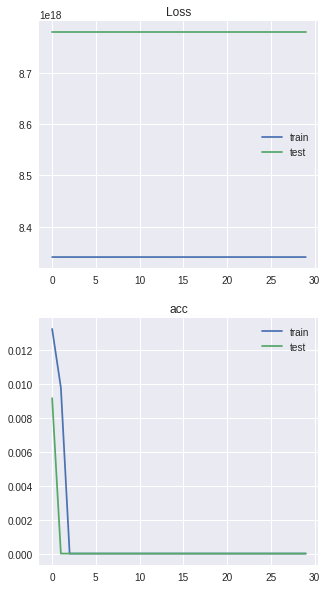

In [144]:
plot_history(history, metric='acc')

I'm going to keep working on this model.  I believe I will need to go back and change focus.  All of the features will have to encoded and run through that way.

My hypothesis is as follows:  If I OHE the Geography feature, it'll create far more features to analyze across the model which we need considering how drastically underfit this model presently is.  This should improve the nuance of the model, allow for improved PCA, provide better clustering, and ultimately give improved acuracy to the model.

As I've been coding for 36 hours straight now, in order to have everything in to unlock the exam, I am having difficulty maintaining the rate.  I will try and get the revamped model in ASAP, but I am getting concerned that the relentless pursuit of perfection required with the submission of all of these assignments it is also going to adversely impact my performance on the incredibly rigorous exams, which the class just learned is you miss just half a point it demotes you to some form of second class belt.  This setup is not very conducive to success in my opinion.